# Machine Learning Visualizations

Once we have run some models using *sklearn* we should try and use *yellowbrick* to build some visualizations from the models we have run. <br>
MJH: Added matplotlib visualizations of team and predicted ratings by year

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib.patches as mpatches

# Visualizations of Event Ratings

## Visualize Original Team Event Ratings

In [257]:
# Read in data = EventID, Date, EventText, FilterWords, FinalRating

teamratings = pd.read_csv('Events_FinalRatingsList.csv', encoding='utf-8')
teamratings.sort_values(by='Date')
teamratings['Date'] = pd.to_datetime(teamratings['Date'])

In [258]:
# Prepare the dataframe for visualization

# Split out month and year for grouping
monthlist = []
daylist = []
yearlist = []
for index, row in teamratings.iterrows():
    monthlist.append(row['Date'].strftime('%m'))
    daylist.append(row['Date'].strftime('%d'))
    yearlist.append(row['Date'].strftime('%Y'))
teamratings['Day'] = daylist
teamratings['Month'] = monthlist
teamratings['Year'] = yearlist

teamratings['FinalRating'] = teamratings['FinalRating'].astype(int)

# Use the ratings 0, 1, 2, 3  
eventmask = (teamratings['FinalRating'] >= 0) & (teamratings['FinalRating'] <= 3)
teamratings = teamratings.loc[eventmask]

teamratings = teamratings.drop('FilterWords', 1)
teamratings = teamratings.rename(columns={'FinalRating': 'TeamRating'})
teamratings.head()

,EventID,Date,EventText,TeamRating,Day,Month,Year
0,1001,2011-01-31,Syrian President Bashar al-Assad criticizes Is...,2,31,01,2011
1,1010,2011-03-11,Reuters reports ‘a large shipment of weapons ...,3,11,03,2011
3,1023,2011-03-26,"Activists and human rights groups said, accord...",0,26,03,2011
4,1025,2011-03-29,"after a government appeal on 28 March, today t...",1,29,03,2011
5,1026,2011-03-30,"In a televised address before parliament, Pres...",2,30,03,2011


### Create Visualization of Raw Event Rating Counts for Original Team Ratings

In [259]:
teamdf = pd.crosstab(teamratings.Year, teamratings.TeamRating,  margins=False)
teamdf = teamdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
teamdf

TeamRating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,1,19,44,46
2012,5,47,55,47
2013,2,14,12,11
2014,1,6,13,13
2015,3,7,12,14
2016,3,10,15,11
2017,4,4,4,4


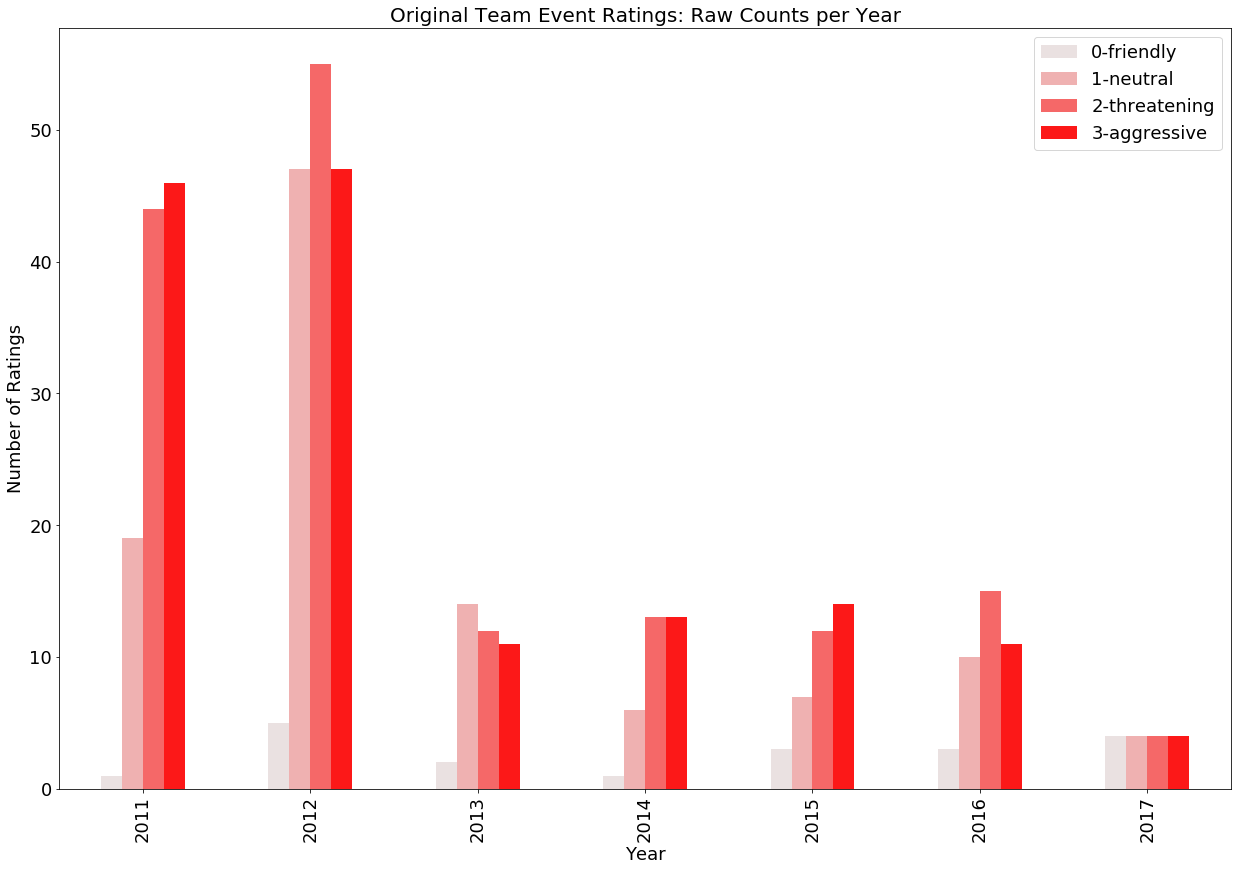

In [260]:
team_colors = ['#eae1e1','#EFB1B1','#F56868','#FC1818']
ax = teamdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', title ="Original Team Event Ratings: Raw Counts per Year",
                                                                               figsize=(21,14), color=team_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Ratings",fontsize=18)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

### Create Visualization of Event Rating Percentages for Original Team Ratings

In [261]:
teamdf = pd.crosstab(teamratings.Year, teamratings.TeamRating,  normalize='index', margins=False)
teamdf = teamdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
teamdf

TeamRating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,0.009091,0.172727,0.400000,0.418182
2012,0.032468,0.305195,0.357143,0.305195
2013,0.051282,0.358974,0.307692,0.282051
2014,0.030303,0.181818,0.393939,0.393939
2015,0.083333,0.194444,0.333333,0.388889
2016,0.076923,0.256410,0.384615,0.282051
2017,0.250000,0.250000,0.250000,0.250000


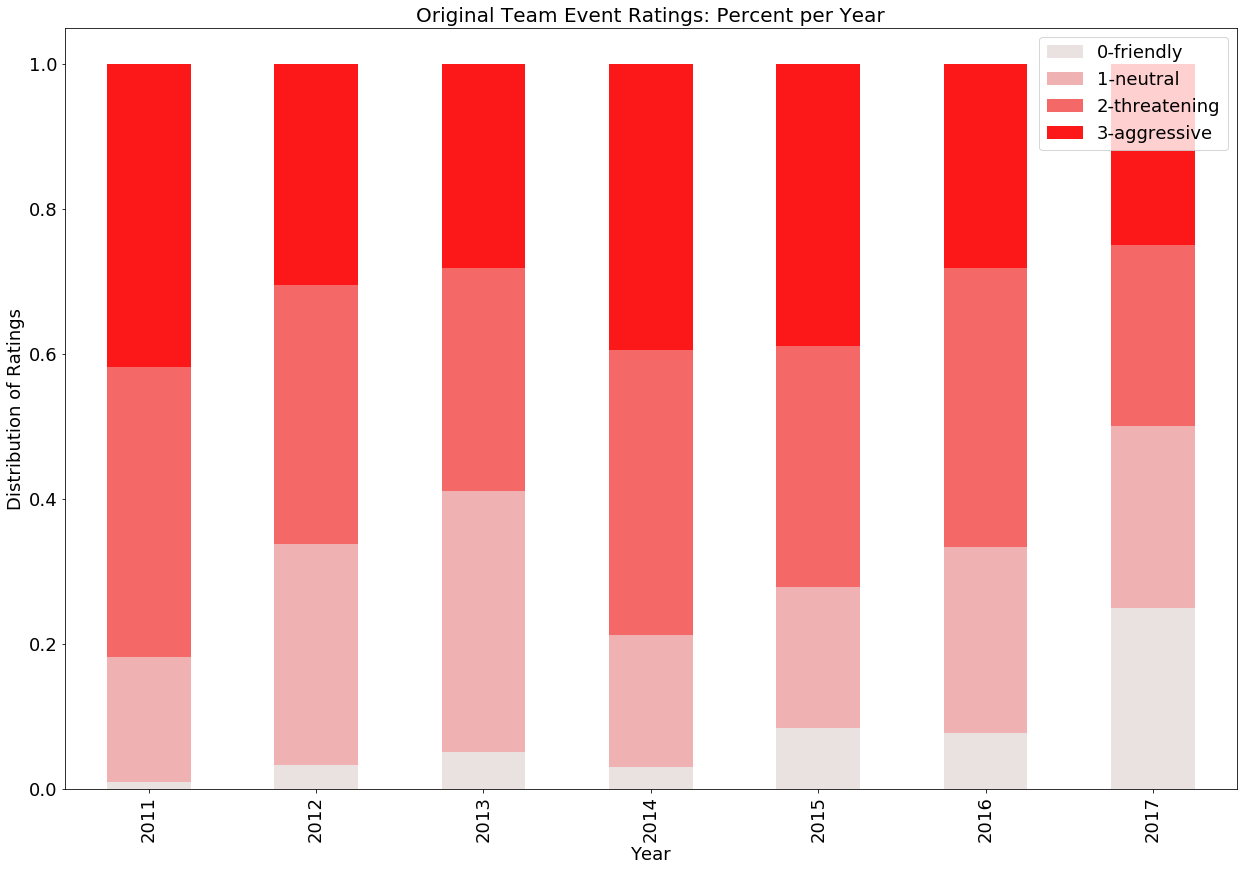

In [262]:
team_colors = ['#eae1e1','#EFB1B1','#F56868','#FC1818']
ax = teamdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', stacked=True, title ="Original Team Event Ratings: Percent per Year",
                                                                               figsize=(21,14), color=team_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

## Visualize Logistic Regression Event Ratings

In [263]:
# Read in data = Date, EventID, FinalRating...

LRratings = pd.read_csv('Final_Clean_Data (Minus -1, 5).csv', encoding='utf-8')
LRratings.sort_values(by='Date')
LRratings['Date'] = pd.to_datetime(LRratings['Date'])

In [264]:
# Prepare the dataframe for visualization

# Split out month and year for grouping
daylist = []
for index, row in LRratings.iterrows():
    daylist.append(row['Date'].strftime('%d'))
LRratings['Day'] = daylist

LRratings['year'] = LRratings['year'].astype(int)
LRratings['month'] = LRratings['month'].astype(int)
LRratings['FinalRating'] = LRratings['FinalRating'].astype(int)

LRratings = LRratings.rename(columns={'FinalRating': 'LR_Rating'})
LRratings.head()

,Unnamed: 0,Date,EventID,LR_Rating,Day of Week,Weekend Flag,year,month,lag_30,lag_14,...,US lagpub_7,Middle East lagpub_14,Other lagpub_14,UK lagpub_14,US lagpub_14,Middle East lagpub_30,Other lagpub_30,UK lagpub_30,US lagpub_30,Day
0,179,2011-01-31,1001.0,2,Monday,0,2011,1,0.001253,0.001988,...,-0.014568,-0.006880,-0.010605,0.014207,-0.014494,-0.006946,-0.010460,0.014048,-0.014435,31
1,202,2011-03-11,1010.0,3,Friday,0,2011,3,-0.002448,-0.008126,...,-0.014568,-0.006880,-0.010605,-0.014919,-0.014494,-0.006946,-0.010460,0.004510,-0.014435,11
2,212,2011-03-26,1023.0,0,Saturday,1,2011,3,-0.011683,-0.013689,...,-0.014568,-0.006880,-0.016582,-0.022885,-0.014494,-0.006946,-0.010748,-0.020609,-0.014435,26
3,215,2011-03-29,1025.0,1,Tuesday,0,2011,3,-0.011787,-0.014316,...,-0.014568,-0.000767,-0.018888,-0.021328,-0.014494,-0.001168,-0.013759,-0.016771,-0.014435,29
4,216,2011-03-30,1026.0,2,Wednesday,0,2011,3,-0.012004,-0.013032,...,-0.025418,-0.006880,-0.013562,-0.020554,-0.011209,-0.006946,-0.014594,-0.016692,-0.015522,30


### Create Visualization of Raw Event Rating Counts for Logistic Regression Event Ratings

In [265]:
LRdf = pd.crosstab(LRratings.year, LRratings.LR_Rating, margins=False)
LRdf = LRdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
LRdf

LR_Rating,0-friendly,1-neutral,2-threatening,3-aggressive
year,,,,
2011,1,12,33,38
2012,2,23,37,37
2013,1,9,12,11
2014,1,6,12,12


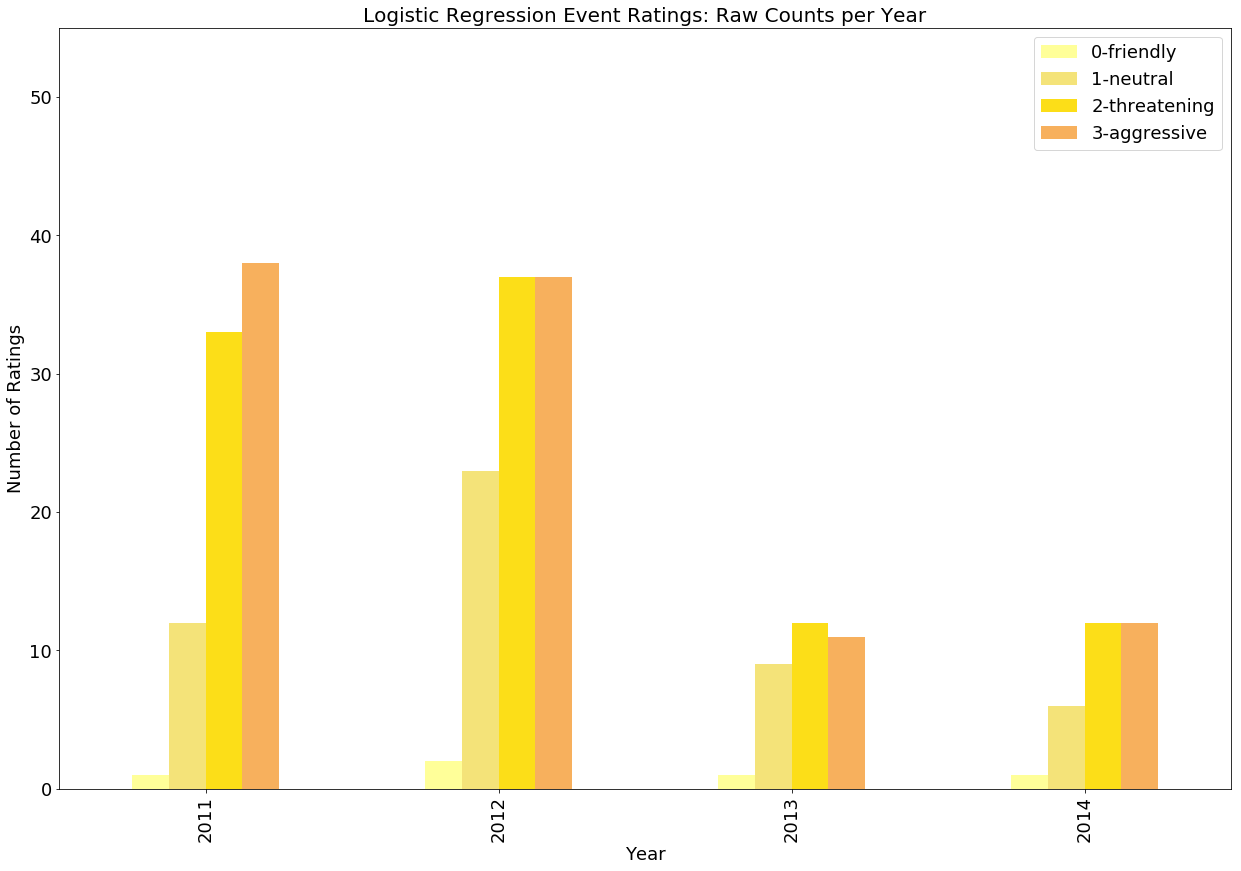

In [266]:
LR_colors = ['#FFFF99','#f4e379','#fcde18','#f7b05d']
ax = LRdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', title ="Logistic Regression Event Ratings: Raw Counts per Year",
                                                                               figsize=(21,14), color=LR_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Ratings",fontsize=18)
ax.set_ylim(0,55)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

### Create Visualization of Event Rating Percentages for Logistic Regression Event Ratings

In [267]:
LRdf = pd.crosstab(LRratings.year, LRratings.LR_Rating, normalize='index', margins=False)
LRdf = LRdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
LRdf

LR_Rating,0-friendly,1-neutral,2-threatening,3-aggressive
year,,,,
2011,0.011905,0.142857,0.392857,0.452381
2012,0.020202,0.232323,0.373737,0.373737
2013,0.030303,0.272727,0.363636,0.333333
2014,0.032258,0.193548,0.387097,0.387097


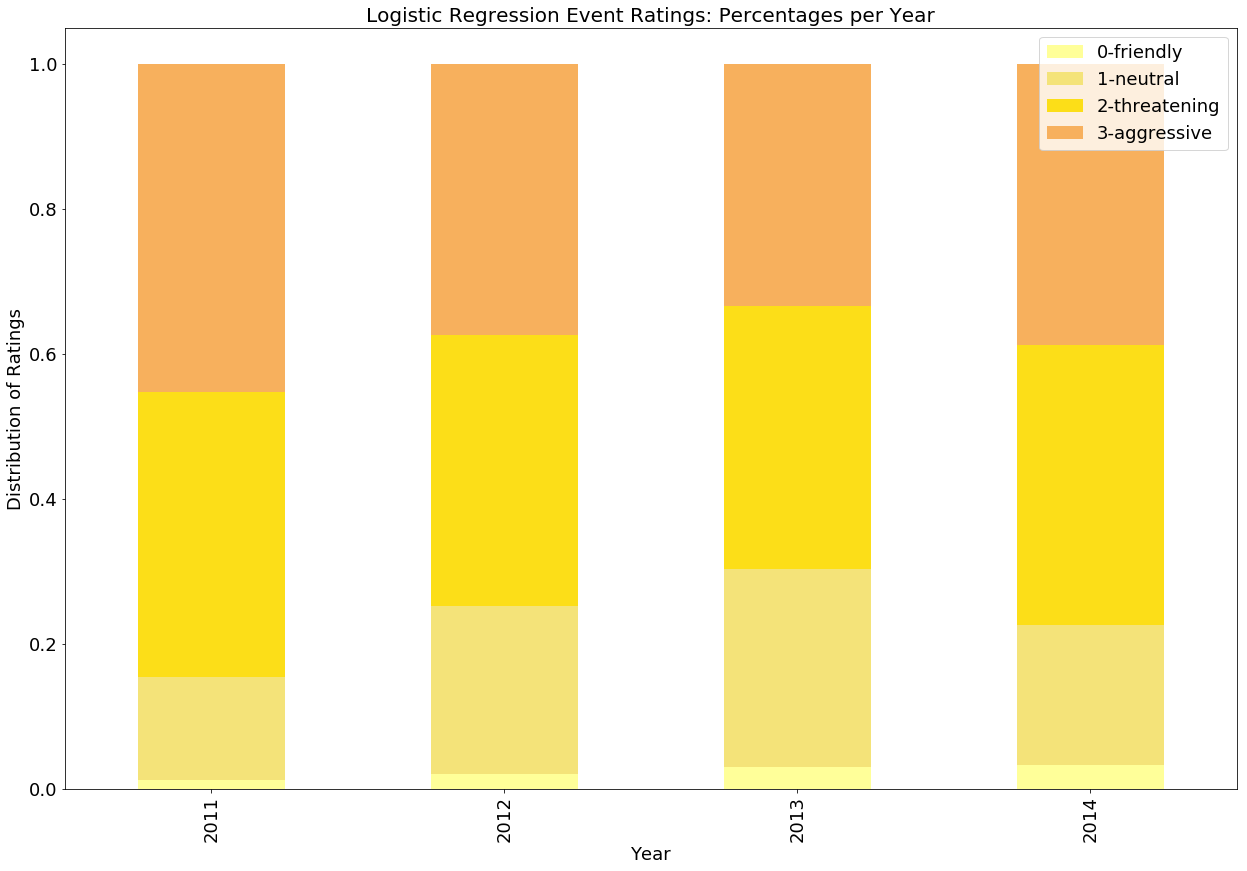

In [268]:
LR_colors = ['#FFFF99','#f4e379','#fcde18','#f7b05d']
ax = LRdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', stacked=True, title ="Logistic Regression Event Ratings: Percentages per Year",
                                                                               figsize=(21,14), color=LR_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)

ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

## Visualize Natural Language Processing Event Ratings

In [269]:
# Read in data = Date, TeamRating, Predicted (Average),Predicted (Mode)

NLPratings = pd.read_csv('OurRatingsVsPredictions.csv', encoding='utf-8')
NLPratings.sort_values(by='Date')
NLPratings['Date'] = pd.to_datetime(NLPratings['Date'])

In [270]:
# Prepare the dataframe for visualization

# Split out month and year for grouping
monthlist = []
daylist = []
yearlist = []
for index, row in NLPratings.iterrows():
    monthlist.append(row['Date'].strftime('%m'))
    daylist.append(row['Date'].strftime('%d'))
    yearlist.append(row['Date'].strftime('%Y'))
NLPratings['Day'] = daylist
NLPratings['Month'] = monthlist
NLPratings['Year'] = yearlist

NLPratings['Year'] = NLPratings['Year'].astype(int)
NLPratings['Month'] = NLPratings['Month'].astype(int)
NLPratings['Predicted (Average)'] = NLPratings['Predicted (Average)'].astype(int)

NLPratings = NLPratings.rename(columns={'Predicted (Average)': 'NLP_Rating'})
NLPratings.head()

,Date,TeamRating,NLP_Rating,Predicted (Mode),Day,Month,Year
0,2011-01-31,2-threatening,2,[2],31,1,2011
1,2011-03-11,3-aggressive,3,[3],11,3,2011
2,2011-03-26,0-friendly,0,[0],26,3,2011
3,2011-04-07,1-neutral,1,[1],07,4,2011
4,2011-04-16,1-neutral,1,[1],16,4,2011


### Create Visualization of Raw Event Rating Counts for NLP Event Ratings

In [271]:
NLPdf = pd.crosstab(NLPratings.Year, NLPratings.NLP_Rating, margins=False)
NLPdf = NLPdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
NLPdf

NLP_Rating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,1,6,10,17
2012,0,6,16,14
2013,0,6,4,9
2014,0,5,5,8
2015,0,5,8,8
2016,3,5,7,5


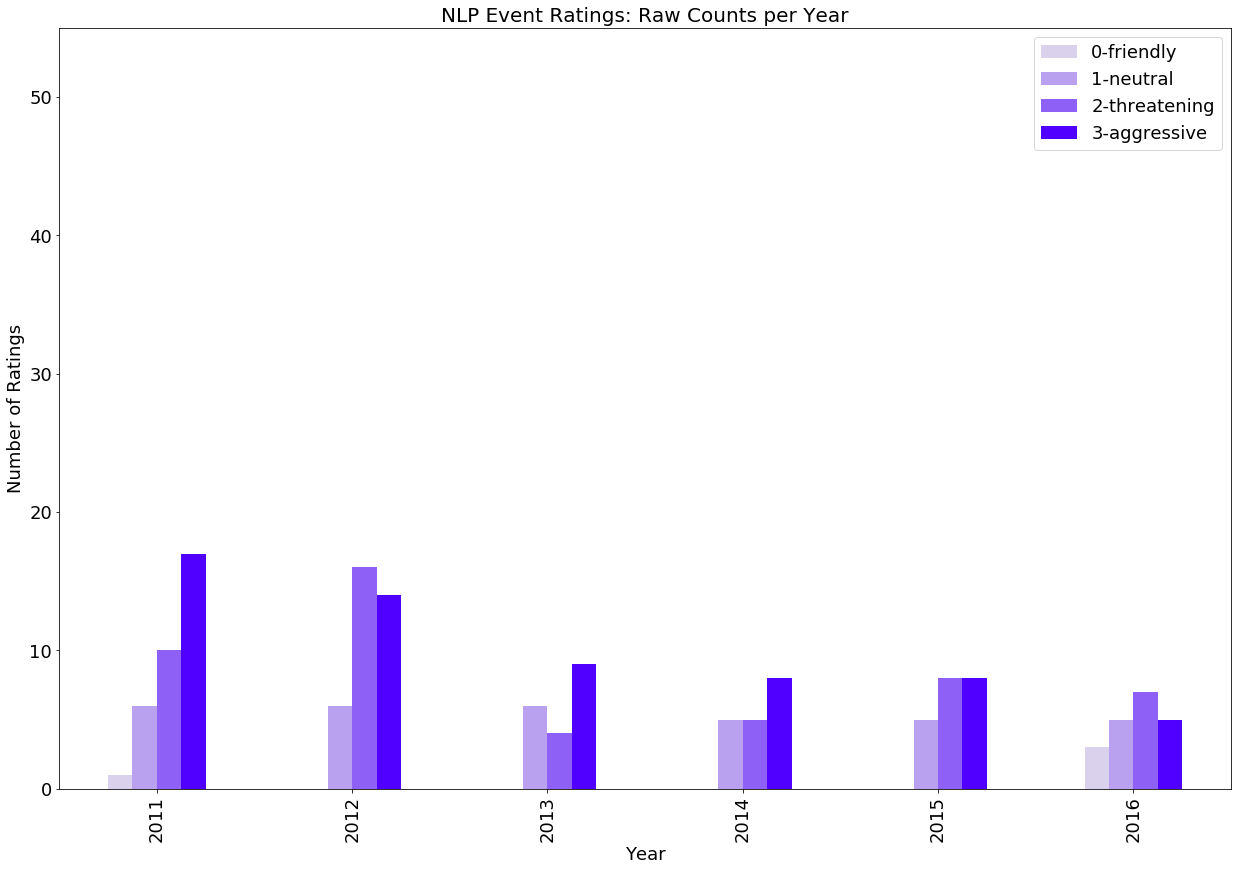

In [272]:
NLP_colors = ['#dad1ec','#baa1f0','#8f60f6','#5000ff']
ax = NLPdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', title ="NLP Event Ratings: Raw Counts per Year",
                                                                               figsize=(21,14), color=NLP_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Ratings",fontsize=18)
ax.set_ylim(0,55)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

### Create Visualization of Event Rating Percentages for NLP Event Ratings

In [273]:
NLPdf = pd.crosstab(NLPratings.Year, NLPratings.NLP_Rating, normalize='index', margins=False)
NLPdf = NLPdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
NLPdf

NLP_Rating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,0.029412,0.176471,0.294118,0.500000
2012,0.000000,0.166667,0.444444,0.388889
2013,0.000000,0.315789,0.210526,0.473684
2014,0.000000,0.277778,0.277778,0.444444
2015,0.000000,0.238095,0.380952,0.380952
2016,0.150000,0.250000,0.350000,0.250000


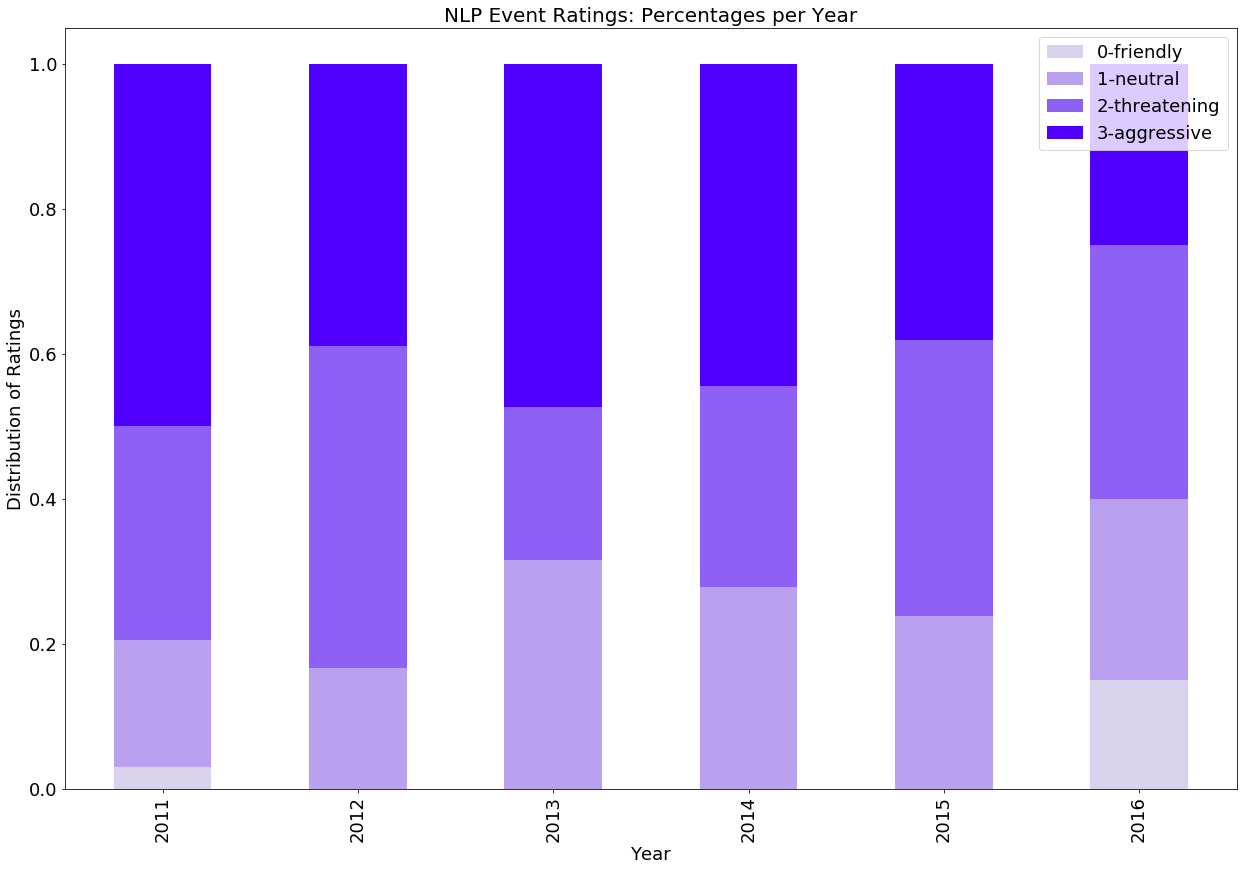

In [274]:
NLP_colors = ['#dad1ec','#baa1f0','#8f60f6','#5000ff']
ax = NLPdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', stacked=True, title ="NLP Event Ratings: Percentages per Year",
                                                                               figsize=(21,14), color=NLP_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)

ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

# Show Distribution of Event Ratings by Rating Method and Year

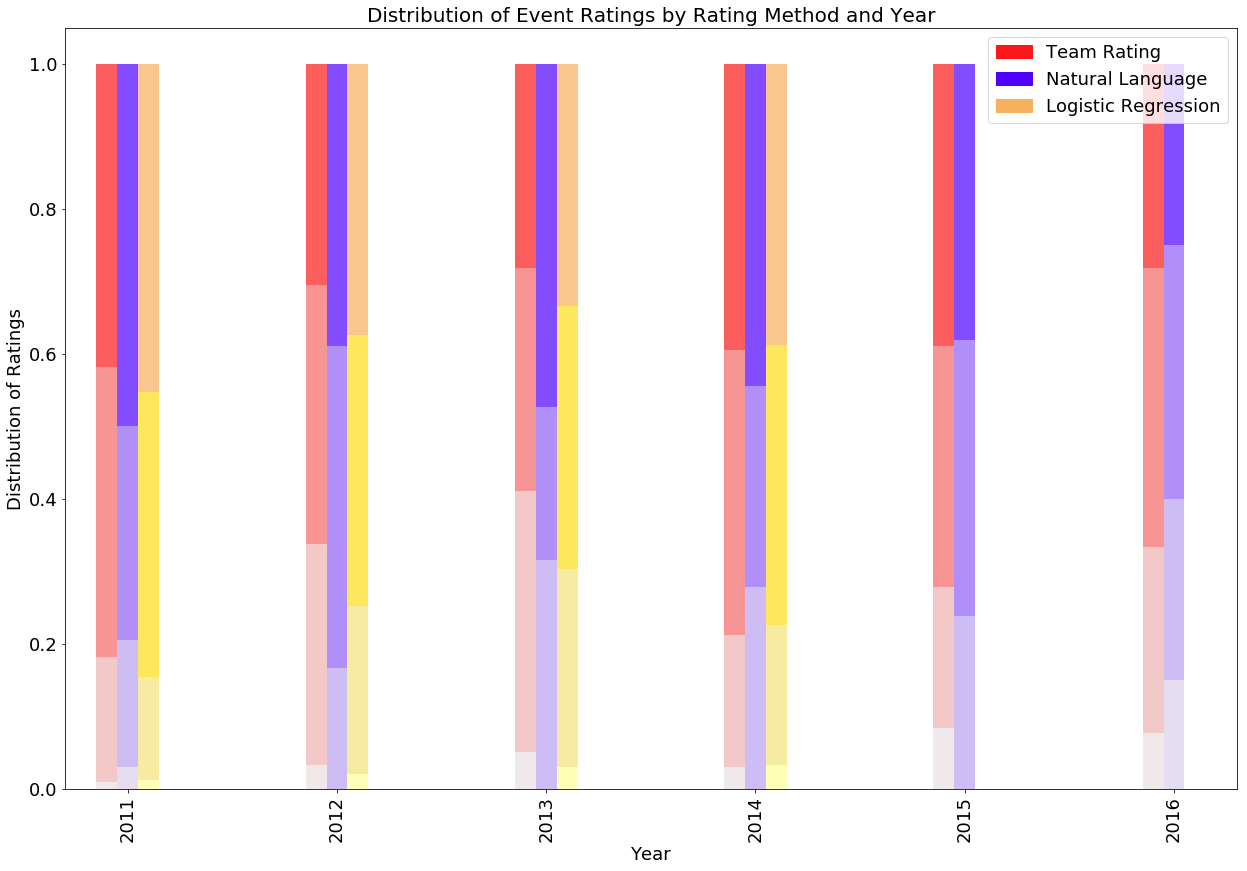

In [281]:
teamdf["Name"] = "teamdf"
LRdf["Name"] = "LRdf"
NLPdf["Name"] = "NLPdf"

fig, ax = plt.subplots()
teamdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot.bar(stacked=True, width=0.1, legend=False, position=1.5, color=team_colors, figsize=(21,14), fontsize=18, ax=ax, alpha=0.7)
LRdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot.bar(stacked=True, width=0.1, legend=False, position=-0.5, color=LR_colors, figsize=(21,14), fontsize=18, ax=ax, alpha=0.7)
NLPdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot.bar(stacked=True, width=0.1, legend=False, position=0.5, color=NLP_colors, figsize=(21,14), fontsize=18, ax=ax, alpha=0.7)

team = mpatches.Patch(color='#FC1818', label='Team Rating')
LR = mpatches.Patch(color='#f7b05d', label='Logistic Regression')
NLP = mpatches.Patch(color='#5000ff', label='Natural Language')
plt.legend(handles=[team,NLP,LR], loc=1, prop={'size': 18})

plt.title('Distribution of Event Ratings by Rating Method and Year')
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)
ax.title.set_fontsize(20)
plt.show()